In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import multivariate_normal

data = pd.read_csv('./data/leukemia_big.csv')
data.shape

(7128, 72)

## Load MFA Model

In [3]:
from module.MFA import MFA

## T-test & select feature

+ The data was divided into AML samples and ALL samples, and T-test was conducted and each was conducted.
+ As a result of the T test, MFA was performed by selecting 100 variables with a significant difference between the mean value of the AML sample and the ALL sample.

In [4]:
ALL_columns = [c for c in data.columns if 'ALL' in c]
AML_columns = [c for c in data.columns if 'AML' in c]
ttest_df = pd.DataFrame(columns=['sampleId','ttest'])
ttest ,pvalue = scipy.stats.ttest_ind(data.T.loc[ALL_columns], data.T.loc[AML_columns])
ttest_df = pd.DataFrame([ttest, pvalue], index=['ttest', 'pvalue']).T
select100 = ttest_df.sort_values('pvalue').iloc[:100].index
X = data.iloc[select100].values
np.random.seed(1234)

In [18]:
gene_type = data.iloc[select100].T.reset_index().rename(columns={'index':'gene_type'})

In [19]:
gene_type_true = np.argmax(pd.get_dummies(gene_type.gene_type.apply(lambda x: x.split('.')[0]))[['AML', 'ALL']].values, axis=1)

In [20]:
def cluster_accuracy(true, cluster):
    ca = np.sum(true == cluster) / cluster.shape[0]
    return ca

## Run MFA code

+ The experiment was conducted by determining the dimension of the latent feature and the number of mixtures as follows.
    - n_factor = 2, n_cluster = 2
    - n_factor = 2, n_cluster = 6
    - n_factor = 4, n_cluster = 6


+ In all three experiments, it was confirmed that the completed log-likelihood converged.

### m_factor = 2, n_cluster = 2

In [73]:
mfa1 = MFA(X, 2, 2)
mfa1.fit(tol_el=1e-1)

completed log-likelihood :  7950.909741754495
completed log-likelihood :  9996.523452025713
completed log-likelihood :  10049.644627786403
completed log-likelihood :  10078.44182257729
completed log-likelihood :  10084.130491930255
completed log-likelihood :  10084.105214946538
old_loss :  10084.130491930255
new_loss :  10084.105214946538


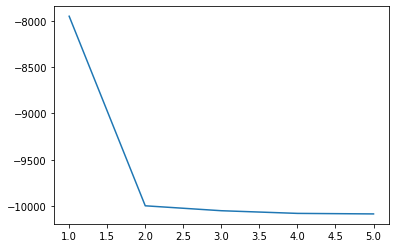

In [74]:
mfa1.plot_loglikelihood()

### n_cluster = 2, n_factor = 6

In [75]:
mfa2 = MFA(X, 2, 6)
mfa2.fit(tol_el=1e-1)

completed log-likelihood :  7982.058512615096
completed log-likelihood :  10010.074462092443
completed log-likelihood :  10060.441810694045
completed log-likelihood :  10082.681953050767
completed log-likelihood :  10084.208363625614
completed log-likelihood :  10083.715723102783
completed log-likelihood :  10083.867665176596
completed log-likelihood :  10083.575092970492
completed log-likelihood :  10083.682886925244
completed log-likelihood :  10083.489249420683
completed log-likelihood :  10083.570191746061
old_loss :  10083.489249420683
new_loss :  10083.570191746061


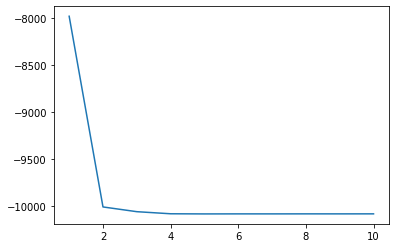

In [76]:
mfa2.plot_loglikelihood()

### n_cluster = 3, n_factor = 2

In [138]:
mfa3 = MFA(X, 3, 2)
mfa3.fit(tol_el=1e-1)

completed log-likelihood :  8874.297363291578
completed log-likelihood :  10282.418340823879
completed log-likelihood :  10347.093257647586
completed log-likelihood :  10365.29696066877
completed log-likelihood :  10367.434757045601
completed log-likelihood :  10368.496828052635
completed log-likelihood :  10371.014928953988
completed log-likelihood :  10380.198363836042
completed log-likelihood :  10382.892871117665
completed log-likelihood :  10383.423343617784
completed log-likelihood :  10383.736749472953
completed log-likelihood :  10383.327773972622
completed log-likelihood :  10387.819258937947
completed log-likelihood :  10386.786949525886
completed log-likelihood :  10393.526820755613
completed log-likelihood :  10458.86010058103
completed log-likelihood :  10501.671919932282
completed log-likelihood :  10514.670336391682
completed log-likelihood :  10526.699258282279
completed log-likelihood :  10531.20637358525


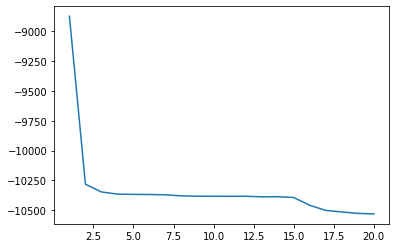

In [139]:
mfa3.plot_loglikelihood()

In [140]:
np.argmax(mfa3.Rjt.T.round(), axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

### n_factor = 4, n_cluster = 6

In [109]:
mfa4 = MFA(X, 6, 4)
mfa4.fit()

completed log-likelihood :  8061.06886490535
completed log-likelihood :  10291.31296111853
completed log-likelihood :  10583.20857308309
completed log-likelihood :  10785.311302743645
completed log-likelihood :  10826.706129128752
completed log-likelihood :  10826.213430368516
completed log-likelihood :  10826.026148929965
completed log-likelihood :  10826.04370589803
old_loss :  10826.026148929965
new_loss :  10826.04370589803


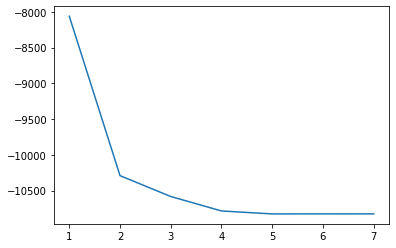

In [110]:
mfa4.plot_loglikelihood()

In [137]:
np.argmax(mfa4.Rjt.T.round(), axis=1)

array([3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1,
       1, 2, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 5, 5, 5, 5, 5,
       0, 5, 5, 5, 0, 5])

## MFA inferece

+ To compare the performance of MFA, we checked how well AML and ALL samples were clustered when the number of mixture was set to two.
+ When comparing the experimental results with 2 and 6 Latent features set, it can be seen that clustering was performed well except for 1 sample in all.

In [92]:
gene_type_cluster = np.argmin(mfa1.Rjt.T, axis=1)

In [93]:
cluster_accuracy(gene_type_true, gene_type_cluster)

0.9861111111111112

In [94]:
gene_type_cluster2 = np.argmin(mfa2.Rjt.T, axis=1)

In [95]:
cluster_accuracy(gene_type_true, gene_type_cluster2)

0.9861111111111112

## Mixture = 2 visualization

+ In order to make a scatter plot, the visualization was performed with two latent features.

In [148]:
valid_data = np.concatenate([mfa1.X, gene_type_cluster.reshape(1,-1), gene_type_true.reshape(1, -1)], axis=0)
X_cluster_0 = valid_data[:, np.where(gene_type_cluster == 0)[0]]
X_cluster_1 = valid_data[:, np.where(gene_type_cluster == 1)[0]]
y_cluster = np.concatenate([X_cluster_0[100,:], X_cluster_1[100,:]])
y_true = np.concatenate([X_cluster_0[101,:], X_cluster_1[101,:]])

In [149]:
dim_reduction_c0 = (np.linalg.inv(mfa1.A[0].T @ mfa1.A[0]) @ mfa1.A[0].T) @ (X_cluster_0[:100,:] - mfa1.mu[0])
dim_reduction_c1 = (np.linalg.inv(mfa1.A[1].T @ mfa1.A[1]) @ mfa1.A[1].T) @ (X_cluster_1[:100,:] - mfa1.mu[1])

In [150]:
dimre_X = np.concatenate([dim_reduction_c0, dim_reduction_c1], axis=1)
dimre_X = np.concatenate([dimre_X, y_true.reshape(1,-1), y_cluster.reshape(1,-1)], axis=0)

+ It was confirmed that cluster2 was concentrated on one side.
+ Looking at the plot, It can be seen that the clusters are similar to the actual values.

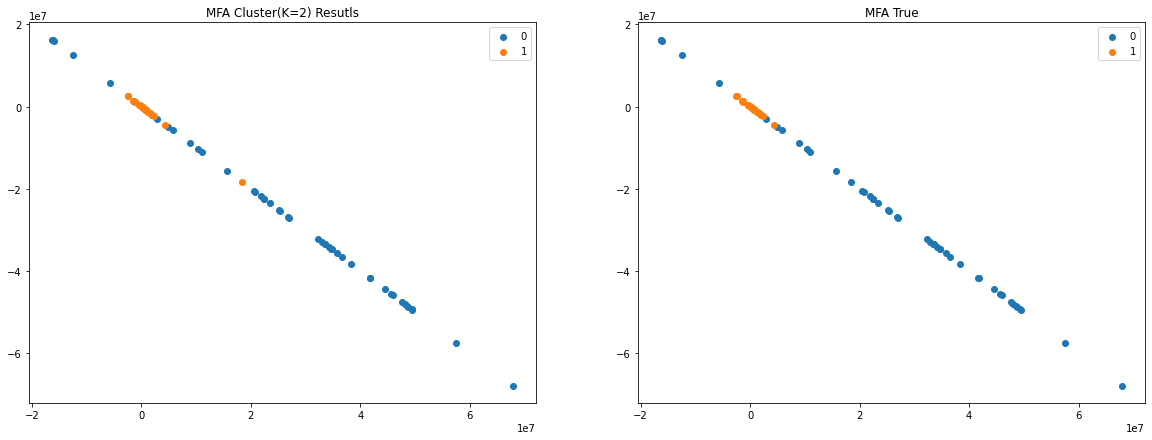

In [183]:
# fig = plt.figure(figsize=(15,10))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
axes[0].scatter(dimre_X.T[np.where(dimre_X.T[:,2]==1), 0], dimre_X.T[np.where(dimre_X.T[:,2]==1), 1])
axes[0].scatter(dimre_X.T[np.where(dimre_X.T[:,2]==0), 0], dimre_X.T[np.where(dimre_X.T[:,2]==0), 1])
axes[1].scatter(dimre_X.T[np.where(dimre_X.T[:,3]==1), 0], dimre_X.T[np.where(dimre_X.T[:,3]==1), 1])
axes[1].scatter(dimre_X.T[np.where(dimre_X.T[:,3]==0), 0], dimre_X.T[np.where(dimre_X.T[:,3]==0), 1])
axes[0].set_title("MFA Cluster(K=2) Resutls")
axes[1].set_title("MFA True")
axes[0].legend(labels=[0,1])
axes[1].legend(labels=[0,1])
plt.show()